In [1]:
from sklearn.metrics import roc_auc_score
import numpy as np
from ops import *
from base import *
from gradients import *

%load_ext autoreload
%autoreload 2

In [2]:
n, k = 100, 2
X = np.random.randn(n, k)
y = np.random.randint(0, 2, n)

In [3]:
d1, d2 = 3, 2
w1_value, b1_value = np.random.randn(k, d1), np.ones(d1)
w2_value, b2_value = np.random.randn(d1, d2), np.ones(d2)

In [4]:
x_ph = Placeholder()
y_ph = Placeholder()
w1 = Variable(w1_value, 'w1')
b1 = Variable(b1_value, 'b1')
w2 = Variable(w2_value, 'w2')
b2 = Variable(b2_value, 'b2')

In [5]:
x = add(matmul(x_ph, w1), b1)
x = relu(x)
scores = add(matmul(x, w2), b2)
probs = softmax(scores)

n_values = y.max() + 1
y_oh = np.eye(n_values)[y]

loss = neg(reduce_sum(multiply(y_ph, probs)))

In [6]:
n_epochs = 1000
optimizer = GradientDescentOptimizer()
for i in range(n_epochs):
    feed_dict = {x_ph: X, y_ph: y_oh}
    optimizer.minimize(loss, feed_dict)
    if i % 100 == 0:
        print(roc_auc_score(y, probs.value[:, 1]))

0.4629629629629629
0.7069243156199678
0.7028985507246377
0.7181964573268921
0.7789855072463767
0.7995169082125604
0.8128019323671498
0.8498389694041868
0.8623188405797101
0.8731884057971016


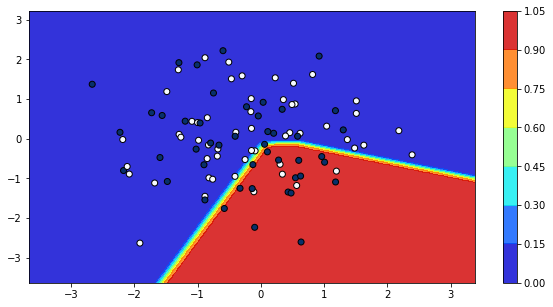

In [7]:
import matplotlib.pyplot as plt

n_grid=100
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, n_grid)
yy = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, n_grid).T
xx, yy = np.meshgrid(xx, yy)
grid = np.c_[xx.ravel(), yy.ravel()]

probs_fitted = forward(probs, {x_ph: grid})
Z = probs_fitted[:, 1].reshape((n_grid, n_grid))

fig, ax = plt.subplots(figsize=(10, 5))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=plt.cm.Blues, edgecolor='k')
plt.colorbar(contour)
plt.show()